In [1]:
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.chdir('../../')

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import torch
import numpy as np
from functools import partial
from pointcept.engines.defaults import (
    default_argument_parser,
    default_config_parser,
    default_setup,
)
from pointcept.datasets import build_dataset_iseg, collate_fn_iseg

In [3]:
args = default_argument_parser().parse_args('')
args.config_file = 'configs/scannet/iseg-agile3d-v1m1.py'
args.options = {'save_path': 'exp/test/datasets_dataloader'}        # exp下只能两层，不然报错
cfg = default_config_parser(args.config_file, args.options)
cfg = default_setup(cfg)

val_dataset = build_dataset_iseg(cfg.data.val, ext_valid_assets=cfg.data.ext_valid_assets)
def base_collate_fn(batch):
    return batch
val_loader = torch.utils.data.DataLoader(
            val_dataset,
            batch_size=1,
            shuffle=False,
            num_workers=1,
            pin_memory=True,
            sampler=None,
            collate_fn=base_collate_fn,
        )
data_iterator = enumerate(val_dataset)
for idx, data_dict in data_iterator:
    break
print(data_dict.keys())

[2025-06-08 09:41:39,349 INFO defaults.py line 70 934524] Totally 312 x 1 samples in scannet val set.


dict_keys(['coord', 'grid_coord', 'inverse', 'segment', 'instance', 'sampled_mask', 'offset', 'feat'])


In [4]:
import pyviz3d.visualizer as viz
import seaborn as sns
cmap = sns.color_palette("icefire", as_cmap=True)

data_dict = val_dataset[0]
v = viz.Visualizer(position=[5, 5, 1])
coord = data_dict["coord"].cpu().numpy()
instance = data_dict["instance"].cpu().numpy()
color = cmap((instance+1) / (instance.max()+1))[:, :3]*255
v.add_points(
        'ins', coord, color, None, visible=False
    )
mask = data_dict["sampled_mask"]
color = np.ones_like(color) * np.array([0, 255, 0])
color[mask] = np.array([255, 0, 0])
v.add_points(
        'sampled', coord, color, None, visible=False
    )
v.save('./exp/vis/scannet')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.

************************************************************************
1) Start local server:
    cd /data/shared_workspace/yuzijian/ws/ISeg3D/exp/vis/scannet; python -m http.server 6008
2) Open in browser:
    http://localhost:6008
************************************************************************


In [65]:
data_dict = val_dataset.get_data(0)
v = viz.Visualizer(position=[5, 5, 1])
coord = data_dict["coord"]
instance = data_dict["instance"]
segment = data_dict["segment"]
color = cmap((instance+1) / (instance.max()+1))[:, :3]*255
v.add_points(
        'ins', coord, color, None, visible=False
    )
mask = ~np.in1d(segment, (-1,))
color = np.ones_like(color) * np.array([0, 255, 0])
color[mask] = np.array([255, 0, 0])
v.add_points(
        'sem_ign', coord, color, None, visible=False
    )
mask = ~np.in1d(segment, (0, 1))
color = np.ones_like(color) * np.array([0, 255, 0])
color[mask] = np.array([255, 0, 0])
v.add_points(
        'sem_bg', coord, color, None, visible=False
    )
mask = ~np.in1d(instance, (-1,))
color = np.ones_like(color) * np.array([0, 255, 0])
color[mask] = np.array([255, 0, 0])
v.add_points(
        'ins_ign', coord, color, None, visible=False
    )
v.save('./exp/vis/scannet')


************************************************************************
1) Start local server:
    cd /data/shared_workspace/yuzijian/ws/ISeg3D/exp/vis/scannet; python -m http.server 6008
2) Open in browser:
    http://localhost:6008
************************************************************************


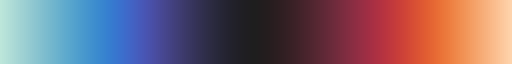

In [62]:
sns.color_palette("icefire", as_cmap=True)